# Timing twinLab functions with different parameters

This notebook demonstrates how to quickly time and produce plots with functions if you want to test to see if some functionality in twinLab has inadvertently slows things down. In the example I have tested async vs sync to produce some plots for a GitHub issue but it can be done with anything. 

This is meant to be a tool that is slightly quicker then writing your own code to test functions.

Results will be saved in the `other_data` folder contained in this directory.

In [1]:
# twinLab imports
import twinlab as tl

# Internal imports
from utils import TimeUnit, TimeBox


          ====== TwinLab Client Initialisation ======
          Version     : 2.5.0
          Server      : https://twinlab.digilab.co.uk/dev
          Environment : /Users/mead/digiLab/twinLab/.env



In [2]:
# Instantiate the parameters needed 

# Fusion data
df = tl.load_example_dataset("tritium-desorption", verbose=True)
dataset = tl.Dataset("fusion")
dataset.upload(df, verbose=True)

# Train the emulator
emulator = tl.Emulator("fusion")
inputs = ["E1", "E2", "E3", "n1", "n2"]
outputs = [f"y{i}" for i in range(0, df.shape[1] - len(inputs))]
params = tl.TrainParams(output_retained_dimensions=5, train_test_ratio=0.1)
emulator.train(dataset, inputs, outputs, params=params, verbose=True)

Example dataset:
           E1        E2        E3        n1        n2            y0  \
0    0.726163  1.248766  1.128671  0.002004  0.000307  1.511613e+17   
1    0.787837  0.925174  1.226117  0.001564  0.000768  7.621430e+16   
2    0.710103  0.902457  1.558539  0.004860  0.000613  2.376907e+17   
3    0.757797  1.187059  1.479970  0.002868  0.000841  1.491269e+17   
4    0.880510  0.987709  1.305003  0.001307  0.000302  8.396414e+15   
..        ...       ...       ...       ...       ...           ...   
395  0.783867  1.193278  1.320413  0.003886  0.000659  1.345699e+17   
396  0.922680  1.079673  1.221674  0.003768  0.000976  5.668893e+15   
397  0.851955  1.066713  1.391201  0.002094  0.000136  2.624759e+16   
398  0.901088  1.227554  1.713012  0.001436  0.000137  5.259842e+15   
399  0.945486  1.088483  1.612626  0.003989  0.000203  2.955044e+15   

               y1            y2            y3            y4  ...  \
0    1.626357e+17  1.749599e+17  1.881609e+17  2.022474e+17  .

Running iteration 1/10 of sample
Running iteration 2/10 of sample
Running iteration 3/10 of sample
Running iteration 4/10 of sample
Running iteration 5/10 of sample
Running iteration 6/10 of sample
Running iteration 7/10 of sample
Running iteration 8/10 of sample
Running iteration 9/10 of sample
Running iteration 10/10 of sample
Running iteration 1/10 of sample
Running iteration 2/10 of sample
Running iteration 3/10 of sample
Running iteration 4/10 of sample
Running iteration 5/10 of sample
Running iteration 6/10 of sample
Running iteration 7/10 of sample
Running iteration 8/10 of sample
Running iteration 9/10 of sample
Running iteration 10/10 of sample
Plotting sample_study


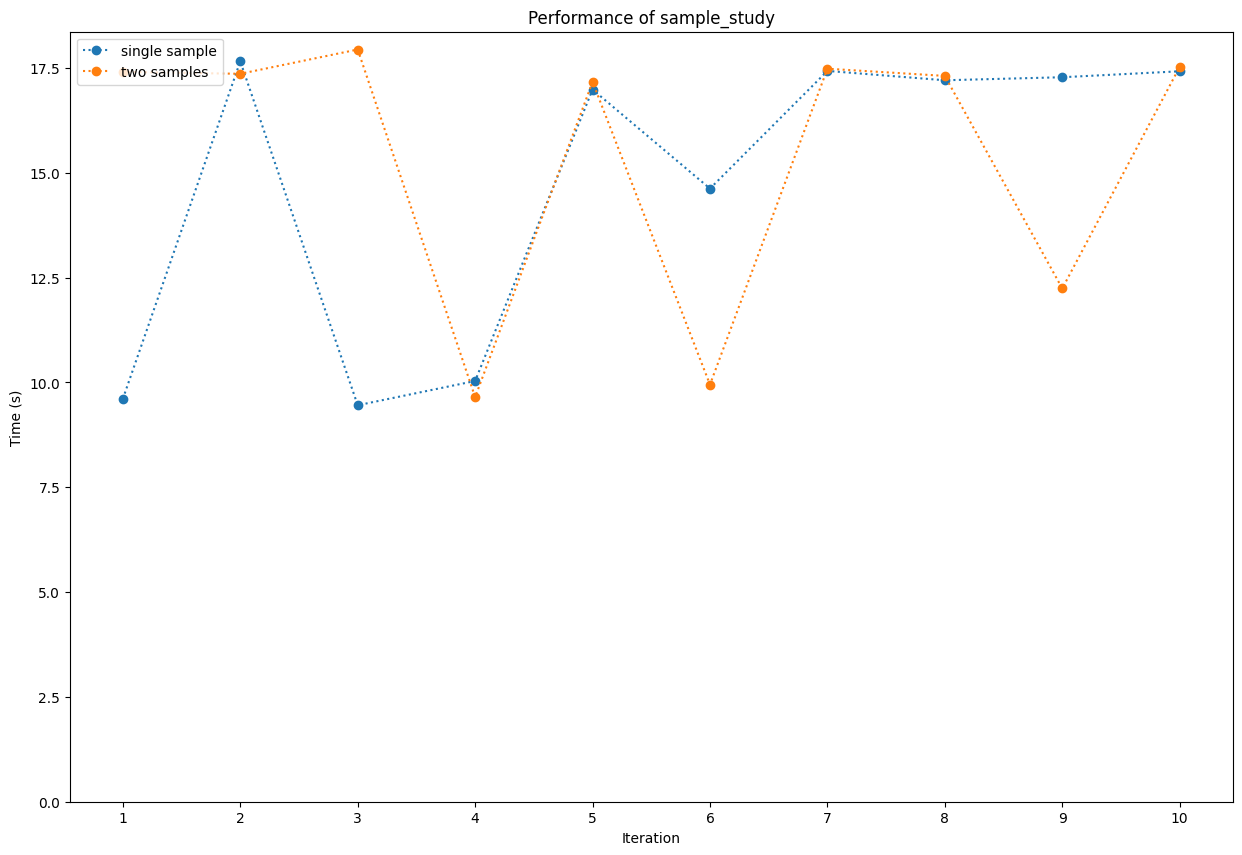

In [3]:
# Set up a timebox
# NOTE: You should give this a sensible name this will be the title of your plots
time_box_example = TimeBox(name="sample_study")

# Add methods to the timebox
time_box_example.add_method(
    TimeUnit(
        tl.Emulator("fusion"),
        "sample",
        label="single sample",
        df=df[:100],
        num_samples=1,
    )
)
time_box_example.add_method(
    TimeUnit(
        tl.Emulator("fusion"),
        "sample",
        label="two samples",
        df=df[:100],
        num_samples=2,
    )
)

# Perform and record time tests
time_box_example.give_times(n=10)